# **Sentiment Analysis of Real-time Flipkart Product Reviews**

**Objective:** The objective of this project is to classify customer reviews as positive or negative and understand the pain points of customers who write negative reviews. By analyzing the sentiment of reviews, we aim to gain insights into product features that contribute to customer satisfaction or dissatisfaction.

**Dataset:** The dataset consists of 8,518 reviews for the "YONEX MAVIS 350 Nylon Shuttle" product from Flipkart. Each review includes features such as Reviewer Name, Rating, Review Title, Review Text, Place of Review, Date of Review, Up Votes, and Down Votes.

### **Loading the data and EDA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")

print(df.shape)
df.head()

(8518, 8)


,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [3]:
#renaming the columns
df.rename(columns={'Reviewer Name': 'reviewer_name', 'Review Title': 'review_title', 'Place of Review': 'place_of_review', 'Up Votes': 'up_votes', 'Down Votes': 'down_votes',
                   'Month': 'month', 'Review text': 'review_text', 'Ratings': 'ratings'}, inplace=True)

In [4]:
df.replace('',np.nan,inplace=True)

# drop nan values in the data
df.dropna(axis=0, how='any', inplace=True)

In [5]:
df.shape

(8013, 8)

In [6]:
df.loc[0, 'review_text']

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE'

In [7]:
df['review_text'] = df['review_text'].str.replace('READ MORE', '')

In [8]:
df.loc[0, 'review_text']

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.'

In [9]:
df.isnull().sum()

reviewer_name      0
review_title       0
place_of_review    0
up_votes           0
down_votes         0
month              0
review_text        0
ratings            0
dtype: int64

In [10]:
rating_sentiment_mapping = {5: 1, 4: 1, 3: 0, 2: 0, 1: 0}

# Mapping the ratings to sentiments
df['sentiment'] = df['ratings'].map(rating_sentiment_mapping)

In [11]:
df.head()

,reviewer_name,review_title,place_of_review,up_votes,down_votes,month,review_text,ratings,sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,1
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,0
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.,5,1
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,1


In [12]:
df.shape

(8013, 9)

In [12]:
df['sentiment'].value_counts(normalize=True)

sentiment
1    0.80644
0    0.19356
Name: proportion, dtype: float64

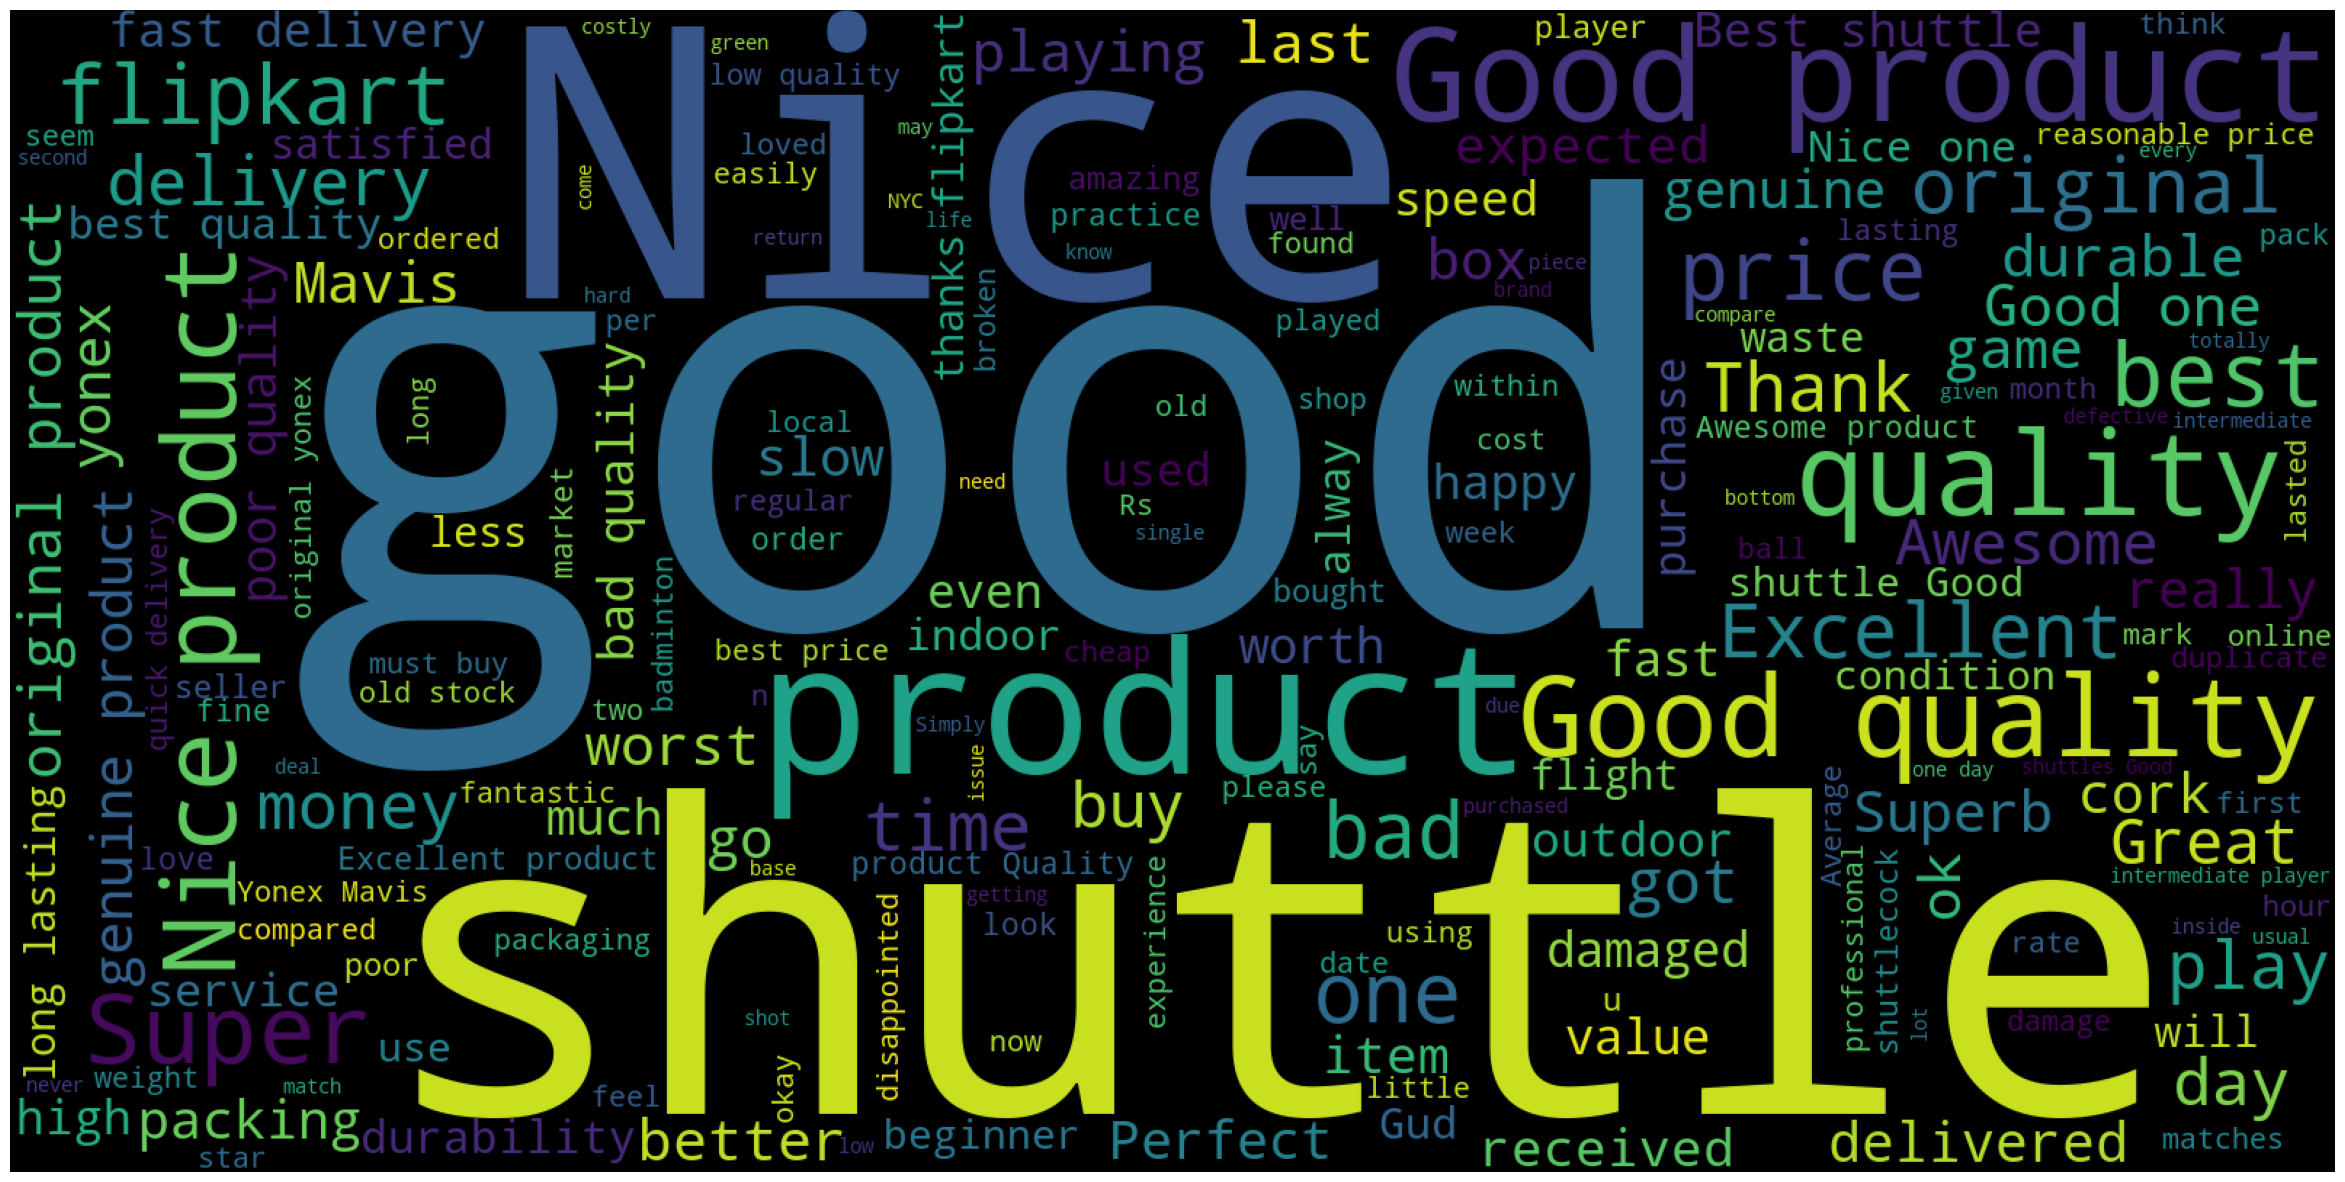

In [13]:
from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(df['review_text']))

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [13]:
# removing the data where we don't want ratings=3.
df = df[df.ratings != 3]

df.shape

(7438, 9)

In [14]:
df = df[["review_text", "sentiment"]]
df.shape

(7438, 2)

In [16]:
df.head()

,review_text,sentiment
0,"Nice product, good quality, but price is now r...",1
1,They didn't supplied Yonex Mavis 350. Outside ...,0
2,Worst product. Damaged shuttlecocks packed in ...,0
5,Good quality product. Delivered on time.,1
6,BEST PURCHASE It is a good quality and is more...,1


In [17]:
df.to_csv('batminton_data.csv', index=False)

### **Step 1 - Identify Input and Output**

In [16]:
X = df.review_text
y = df.sentiment
print(X.shape, y.shape)

(7438,) (7438,)


### **Step 2 - Split the Data into Train and Test**

In [17]:
from sklearn.model_selection import train_test_split

# By default, it splits 75% training and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5578,) (5578,)
(1860,) (1860,)


### **Step 3 - Data Preprocessing on Train data (X_train)**

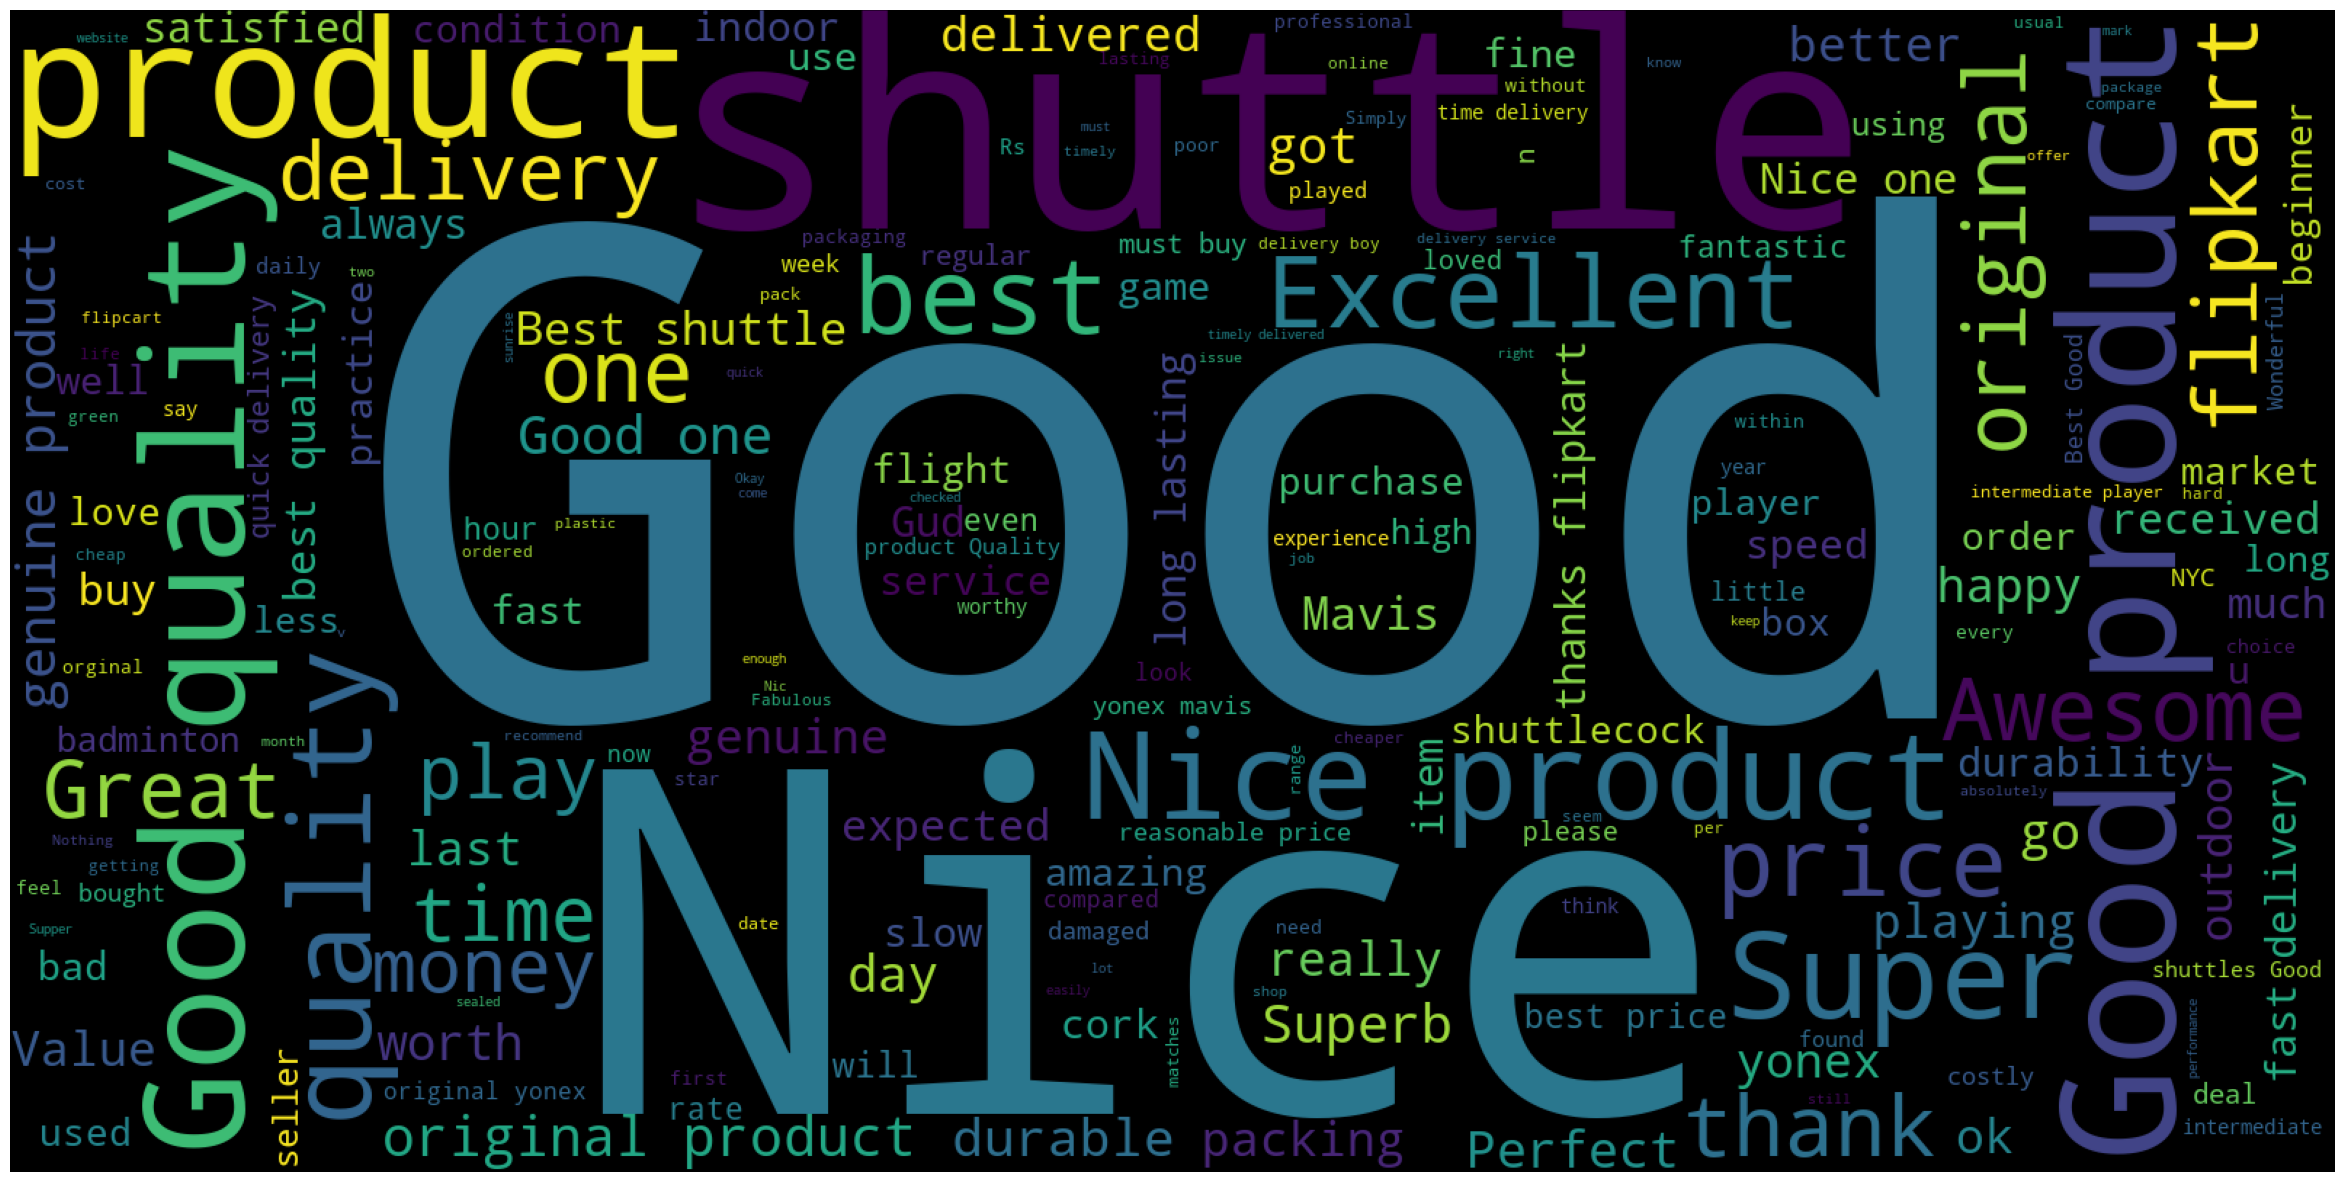

In [18]:
def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

display_wordcloud(X_train[y_train==1])

In [19]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hanna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hanna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hanna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [21]:
def clean(doc): # doc is a string of text
    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Remove special characters and punctuation
    doc = re.sub(r"[^a-zA-Z]", " ", doc)

    # Remove special characters and digits
    doc = re.sub(r'\W+', ' ', doc)

    # Remove punctuation
    doc = doc.translate(str.maketrans('', '', string.punctuation))

    # Converting to lower case
    doc = doc.lower()

    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))

    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]

    # Join and return
    return " ".join(filtered_tokens)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(preprocessor=clean)

%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

CPU times: total: 3.56 s
Wall time: 8.71 s
(5578, 2253)


### **Step 4 - Data Preprocessing on Test data (X_test)**

In [23]:
X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

(1860, 2253)


### **Step 5 - Building a Model (i.e. Train the classifier)**

In [24]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: total: 0 ns
Wall time: 2.17 ms


MultinomialNB()

### **Step 6 - Evaluating on Train Data**

In [25]:
from sklearn import metrics

y_train_pred = nb.predict(X_train_dtm)

print(metrics.accuracy_score(y_train, y_train_pred))

metrics.confusion_matrix(y_train, y_train_pred)

0.9406597346719254


array([[ 508,  256],
       [  75, 4739]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

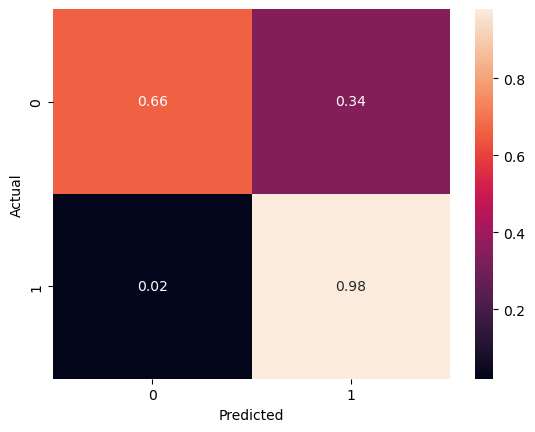

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

### **Step 7 - Evaluating on Test Data**

In [27]:
y_test_pred = nb.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_test_pred)

0.932258064516129

Text(0.5, 23.52222222222222, 'Predicted')

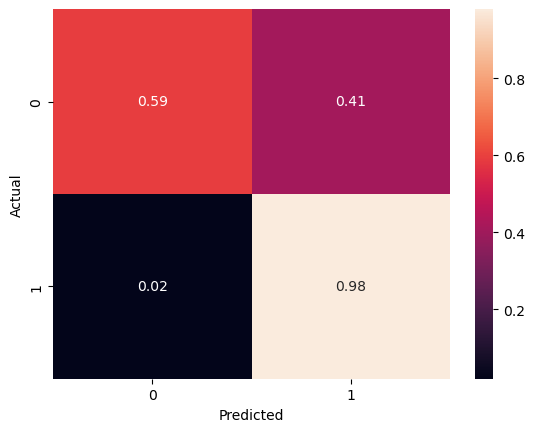

In [28]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [29]:
print("Train Score (F1 Score):", metrics.f1_score(y_train, y_train_pred))

print("Test Score (F1 Score):", metrics.f1_score(y_test, y_test_pred))

Train Score (F1 Score): 0.9662554796615354
Test Score (F1 Score): 0.9623205741626795


### **Going Back and Applying all the Steps Again**

In [30]:
vect = CountVectorizer(preprocessor=clean, max_features=5000)
%time X_train_dtm = vect.fit_transform(X_train)

X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

CPU times: total: 2.47 s
Wall time: 5.14 s
(5578, 2253) (1860, 2253)


In [31]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: total: 0 ns
Wall time: 4.04 ms


MultinomialNB()

In [32]:
y_train_pred = nb.predict(X_train_dtm)

metrics.f1_score(y_train, y_train_pred)

0.9662554796615354

Text(0.5, 23.52222222222222, 'Predicted')

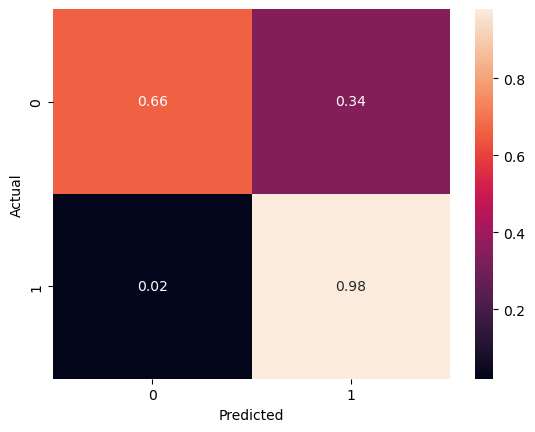

In [33]:
cm = metrics.confusion_matrix(y_train, y_train_pred)

actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [34]:
y_test_pred = nb.predict(X_test_dtm)

metrics.f1_score(y_test, y_test_pred)

0.9623205741626795

Text(0.5, 23.52222222222222, 'Predicted')

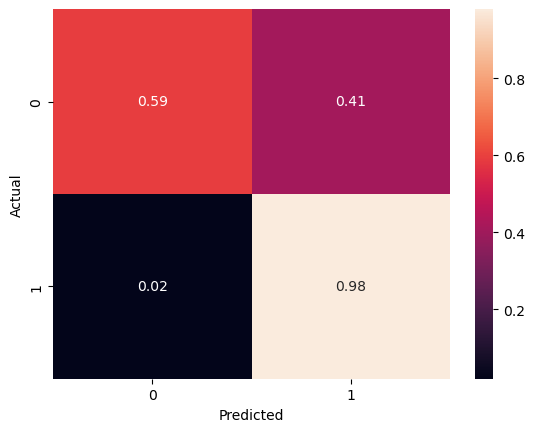

In [35]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

## **Creating an Optimal Workflow**

Pipeline allows you to sequentially apply a list of transformers to preprocess the data and, if desired, conclude the sequence with a final predictor for predictive modeling.

In [36]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

In [37]:
import joblib
from joblib import Memory

import os
import warnings

warnings.filterwarnings('ignore')

In [38]:
# Improving the efficiency by applying cleaning the text data before hand

%time X_train_clean = X_train.apply(lambda doc: clean(doc))

CPU times: total: 2.64 s
Wall time: 5.4 s


In [39]:
%time X_test_clean = X_test.apply(lambda doc: clean(doc))

CPU times: total: 1.36 s
Wall time: 1.87 s


## MLFlow Integration

In [40]:
! pip install mlflow

In [41]:
import mlflow

mlflow.set_experiment("sentimental_analysis_prediction_experimentation")

2024/03/26 13:46:23 INFO mlflow.tracking.fluent: Experiment with name 'sentimental_analysis_prediction_experimentation' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/hanna/Desktop/Anu/INNOMATICS/Assignments/08_Using%20MLFlow%20for%20Experiment%20Tracking%20and%20Model%20Management/mlruns/196180874732140844', creation_time=1711440983836, experiment_id='196180874732140844', last_update_time=1711440983836, lifecycle_stage='active', name='sentimental_analysis_prediction_experimentation', tags={}>

In [42]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'knn': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', KNeighborsClassifier())
    ], memory=memory),
    'svc': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', SVC())
    ], memory=memory),
    'random_forest': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', RandomForestClassifier())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'knn': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'classifier__n_neighbors' : [i for i in range(3, 21, 2)],
            'classifier__p' : [1, 2, 3]
        }
    ],
    'svc': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'classifier__kernel' : ['rbf'], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }, 
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'classifier__kernel' : ['poly'], 
            'classifier__degree' : [2, 3, 4, 5], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }, 
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'classifier__kernel' : ['linear'], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }
    ],
    'random_forest': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'classifier__n_estimators': [50, 100, 200]
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

# Run the Pipeline
for algo in pipelines.keys():
    print("*"*15, algo, "*"*15)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1
                              )
    
    mlflow.sklearn.autolog(max_tuning_runs=None)
    
    with mlflow.start_run() as run:
        %time grid_search.fit(X_train_clean, y_train)
    
    best_models[algo] = grid_search.best_estimator_
        
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test_clean, y_test))
    print()

*************** naive_bayes ***************


2024/03/26 13:46:30 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logged at level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2024/03/26 13:46:30 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.

Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 5.62 s
Wall time: 19 s
Train Score:  0.9580309029325417
Test Score:  0.9615153337342153

*************** decision_tree ***************


2024/03/26 13:46:50 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 37 s
Wall time: 1min 13s
Train Score:  0.9518680086989907
Test Score:  0.9616066154754873

*************** logistic_regression ***************


2024/03/26 13:48:04 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 9min 9s
Wall time: 14min 53s
Train Score:  0.943096885856019
Test Score:  0.9449938195302843

*************** knn ***************


2024/03/26 14:02:58 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: total: 13min 40s
Wall time: 5min 39s
Train Score:  0.9521773820653149
Test Score:  0.961254066844129

*************** svc ***************


2024/03/26 14:08:39 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 60 candidates, totalling 300 fits
CPU times: total: 6min 34s
Wall time: 11min 14s
Train Score:  0.9576139511621806
Test Score:  0.9634472511144131

*************** random_forest ***************


2024/03/26 14:19:54 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 4min 12s
Wall time: 6min 22s
Train Score:  0.9553744768582643
Test Score:  0.964424514200299



In [43]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1500)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=1000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.4,
                                    penalty='elasticnet', solver='saga'))])

knn
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier(n_neighbors=15))])

svc
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorize